In [47]:
import pandas as pd
import numpy as np
from pyairtable import Table
from itertools import chain
import glob
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.colors import rgb2hex
from generativepy.color import Color
from PIL import ImageColor
import geopandas as gpd
import datetime as dt
import matplotlib
import matplotlib.patches as mpatches
from matplotlib import font_manager
from matplotlib.dates import date2num
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import Normalize
from matplotlib.dates import DateFormatter
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import ListedColormap
import matplotlib.dates as md
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import geopandas
import pycountry
import time
import string
import warnings
warnings.filterwarnings('ignore')

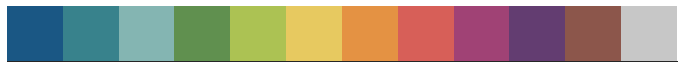

In [48]:
colors = ['#1A5784', '#38828C', '#84B5B2', '#60904F', '#ACC253', '#E7C960', '#E49243', '#D75F58', '#A04275', '#633D71', '#8c564b', '#c7c7c7']
sns.palplot(sns.color_palette(colors))



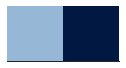

In [49]:
# Define gradient color
# gradient = ['#84B5B2', '#1A5784']
gradient = ['#96B7D6', '#001842']
cm = LinearSegmentedColormap.from_list(
        "Custom", gradient, N=100)
sns.palplot(sns.color_palette(gradient))

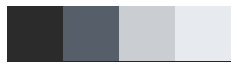

In [50]:
# Define chart color palette
chart = ['#2C2B2B','#565E69','#CACED3','#E7EAEE']
sns.palplot(sns.color_palette(chart))

In [132]:
# Define constants
figure_size = (20,6)

# # Define x-axis range
# left = dt.date(2005, 1, 1)
# right = dt.date(2023, 9, 1)

# Set background
sns.set_context('talk') #change the size from small to medium
sns.set_style('white') #change bg to white

# Add every font at the specified location
font_dir = ['/Users/haileyrobertson/Library/Fonts']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
    
# Set font family globally
plt.rcParams['font.family'] = 'Open Sans'
plt.rcParams['font.weight'] = 'bold'

# Set margins
plt.rcParams['axes.xmargin'] = 0.9

# Define list of date formats
zfmts = ['', '%Y','%b\n%Y', '%b', '%b-%d', '%H:%M', '%H:%M']

# Format axes 
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.titlepad'] = 30

# Format ticks
plt.rcParams["xtick.direction"] = "out"
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.color'] = chart[2]
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['xtick.labelcolor'] = chart[1]
plt.rcParams['xtick.labelsize'] = 12

plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.major.pad"] = -35
plt.rcParams["ytick.minor.pad"] = -35
plt.rcParams["ytick.major.size"] = 10
plt.rcParams["ytick.minor.size"] = 10
plt.rcParams["ytick.color"] = chart[2]
plt.rcParams["ytick.major.width"] = 1
plt.rcParams["ytick.minor.width"] = 1
plt.rcParams["ytick.labelcolor"] = chart[1]
plt.rcParams["ytick.labelsize"] = 12


# Adjust fontdict for title
titlefont = {'family': 'Open Sans',
             'color':  chart[0], 
             'weight': 400,
             'size': 20}

# Set grid style
plt.rcParams['grid.color'] = chart[2]
plt.rcParams['grid.linestyle'] = 'dashed'
plt.rcParams['grid.linewidth']=0.7

# Set legend style
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['legend.handlelength'] = 1
plt.rcParams['legend.handleheight'] = 1.125



# Set axis labels
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelcolor'] = chart[1]

In [52]:
# Function to remove the first and last characters from a string
def remove_chars(s):
    return s[1:-1]

In [89]:
master = pd.read_csv('data/h5n1_cases_country_species_class_month.csv')
country_match = pd.read_csv('data/country_match.csv')

master = pd.merge(master, country_match, left_on="country",right_on="iso2", how = "inner")
master = master.drop(['name','iso2','country'], axis=1)

master['yearMonth'] = master['yearMonth'].apply(remove_chars)
master['species'] = master['species'].apply(remove_chars)
master['class'] = master['class'].apply(remove_chars)
master['iso3'] = master['iso3'].apply(remove_chars)

master['yearMonth'] = pd.to_datetime(master['yearMonth'], format="%Y-%m")
master = master.sort_values(by=["yearMonth","iso3"])

In [90]:

# Filter the DataFrame to only include rows where class is "mammalia"
mammalia_df = master[master['class'] == 'Mammalia']

# Group by species and calculate the sum of monthlyCases for each species
grouped_df = mammalia_df.groupby('species')['monthlyCases'].sum().reset_index()

# Sort the species by their totalCases in descending order
sorted_df = grouped_df.sort_values(by='monthlyCases', ascending=False)

# Retrieve the top 10 species with the highest total cases
top_10_species = sorted_df.head(10)

print(top_10_species)


                   species  monthlyCases
19           Vulpes vulpes           157
10       Mephitis mephitis           114
16          Phoca vitulina            27
17                    Puma            19
0               Bos taurus            14
7               Lynx rufus             6
4              Felis catus             6
2   Canis lupus familiaris             5
3     Didelphis virginiana             3
15        Pekania pennanti             3


In [91]:
# List of species names to filter
species_list = ['Bos taurus', 'Canis lupus familiaris', 'Felis catus', 'Lynx rufus', 'Mephitis mephitis', 'Pekania pennanti', 'Phoca vitulina', 'Puma', 'Vulpes vulpes', 'Didelphis virginiana']


# Filter the DataFrame to only include rows with the specified species names
filtered_df = master[master['species'].isin(species_list)]

In [92]:

# Pivot the DataFrame with species as columns
pivot_df = filtered_df.pivot_table(index='yearMonth', columns='species', values='monthlyCases', aggfunc='sum', fill_value=0)

# Flatten the DataFrame
pivot_df.reset_index(inplace=True)

# Set 'yearMonth' as the index again
pivot_df.set_index('yearMonth', inplace=True)

# Resample the DataFrame and forward fill missing months
pivot_df = pivot_df.asfreq('MS',fill_value=0).reset_index()

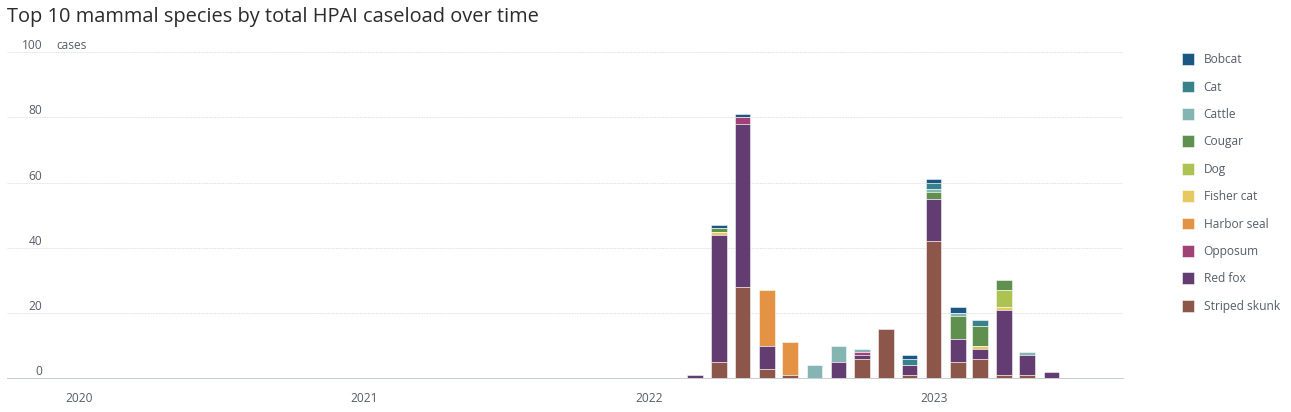

In [100]:
# Format figure
fig, ax = plt.subplots(figsize=(figure_size))
ax.spines.left.set_visible(False)

# Format bottom axis
for axis in ['bottom']:
    ax.spines[axis].set_color(chart[2])
    
# Add grid lines    
plt.grid(axis='y')

# Define variables
x=pivot_df['yearMonth']
y1=pivot_df['Lynx rufus']
y2=pivot_df['Felis catus']
y3=pivot_df['Bos taurus']
y4=pivot_df['Puma']
y5=pivot_df['Canis lupus familiaris']
y6=pivot_df['Pekania pennanti']
y7=pivot_df['Phoca vitulina']
y8= pivot_df['Didelphis virginiana']
y9 = pivot_df['Vulpes vulpes']
y10 =pivot_df['Mephitis mephitis']

# Plot bars
# The thing that gets plotted last in this list gets plotted on the bottom

plt.bar(x, y1, bottom=y2+y3+y4+y5+y6+y7+y8+y9+y10, linewidth=0.5, width=20, align="center", color=colors[0], label='Bobcat') 
plt.bar(x, y2, bottom=y3+y4+y5+y6+y7+y8+y9+y10, linewidth=0.5, width=20, align="center", color=colors[1], label='Cat')
plt.bar(x, y3, bottom=y4+y5+y6+y7+y8+y9+y10, linewidth=0.5,width=20, align="center", color=colors[2], label='Cattle')
plt.bar(x, y4, bottom=y5+y6+y7+y8+y9+y10, linewidth=0.5,width=20, align="center", color=colors[3], label='Cougar')
plt.bar(x, y5, bottom=y6+y7+y8+y9+y10, linewidth=0.5, width=20, align="center", color=colors[4], label='Dog')
plt.bar(x, y6, bottom=y7+y8+y9+y10, linewidth=0.5, width=20, align="center", color=colors[5], label='Fisher cat')
plt.bar(x, y7, bottom=y8+y9+y10, linewidth=0.5,width=20, align="center", color=colors[6], label='Harbor seal')
plt.bar(x, y8, bottom=y9+y10, linewidth=0.5,width=20, align="center", color=colors[8], label='Opposum')
plt.bar(x, y9, bottom=y10, linewidth=0.5, width=20, align="center", color=colors[9], label='Red fox')
plt.bar(x, y10, bottom=0, linewidth=0.5, width=20, align="center", color=colors[10], label='Striped skunk')


ax.xaxis_date()

# Define x-axis range
left = dt.date(2019, 10, 1)
right = dt.date(2023, 9, 1)

# Changes x-axis range
plt.gca().set_xbound(left, right)

# Changes y-axis range
plt.gca().set_ybound(0,100)

# Set major and minor date tick locators
maj_loc = mdates.YearLocator()
ax.xaxis.set_major_locator(maj_loc)
min_loc = mdates.MonthLocator()
ax.xaxis.set_minor_locator(min_loc)

# Set major date tick formatter
maj_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(maj_fmt)

# Hide minor tick labels
ax.xaxis.set_tick_params(which='minor', labelbottom=False)

# Set title
title = "Top 10 mammal species by total HPAI caseload over time"
plt.title(title, fontdict=titlefont, loc='left')

# Set x-axis label
plt.xlabel("")

# Extend x-axis without showing labels
for label in ax.xaxis.get_ticklabels()[:1]:
    label.set_visible(False)
    
for x in ax.xaxis.get_major_ticks()[:1]:
    x.set_visible(False) 
    
for x in ax.xaxis.get_minor_ticks()[:9]:
    x.set_visible(False)

# Format y-axis label
plt.ylabel("cases", rotation=0,loc='top',labelpad=-80,color=chart[1])
for tick in ax.get_yticklabels():
    tick.set_verticalalignment("bottom")
    
# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


# Get the legend and modify the handles
handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.15,1.03),labelcolor=chart[1],labelspacing=1.2)


# plt.tight_layout()
# plt.show()
plt.savefig('figures/hpai_mammal_10_2020.png', dpi=1200, facecolor='w', 
            edgecolor='w', 
            orientation='portrait',bbox_inches='tight')

In [153]:

# Filter the DataFrame to only include rows where class is "mammalia"
birds_df = master[master['class'] == 'Aves']

# Group by species and calculate the sum of monthlyCases for each species
grouped_df = birds_df.groupby('species')['monthlyCases'].sum().reset_index()

# Sort the species by their totalCases in descending order
sorted_df = grouped_df.sort_values(by='monthlyCases', ascending=False)

# Retrieve the top 10 species with the highest total cases
top_10_species = sorted_df.head(11)

print(top_10_species)


                        species  monthlyCases
17                         Aves      30114431
99       Phalacrocorax capensis         16771
36   Chroicocephalus ridibundus          1718
65                 Grus monacha          1125
117         Spheniscus demersus           539
51                  Cygnus olor           366
133          Thalasseus maximus           360
72      Ichthyaetus ichthyaetus           301
123              Sterna hirundo           250
20            Branta canadensis           240
46             Corvus splendens           218


In [182]:
# List of species names to filter
species_list = ["Aves", "Phalacrocorax capensis","Chroicocephalus ridibundus","Grus monacha","Spheniscus demersus","Cygnus olor","Thalasseus maximus","Ichthyaetus ichthyaetus","Sterna hirundo","Branta canadensis"]
# Filter the DataFrame to only include rows with the specified species names
filtered_df = master[master['species'].isin(species_list)]

In [183]:

# Pivot the DataFrame with species as columns
pivot_df = filtered_df.pivot_table(index='yearMonth', columns='species', values='monthlyCases', aggfunc='sum', fill_value=0)

# Flatten the DataFrame
pivot_df.reset_index(inplace=True)

# Set 'yearMonth' as the index again
pivot_df.set_index('yearMonth', inplace=True)

# Resample the DataFrame and forward fill missing months
pivot_df = pivot_df.asfreq('MS',fill_value=0).reset_index()

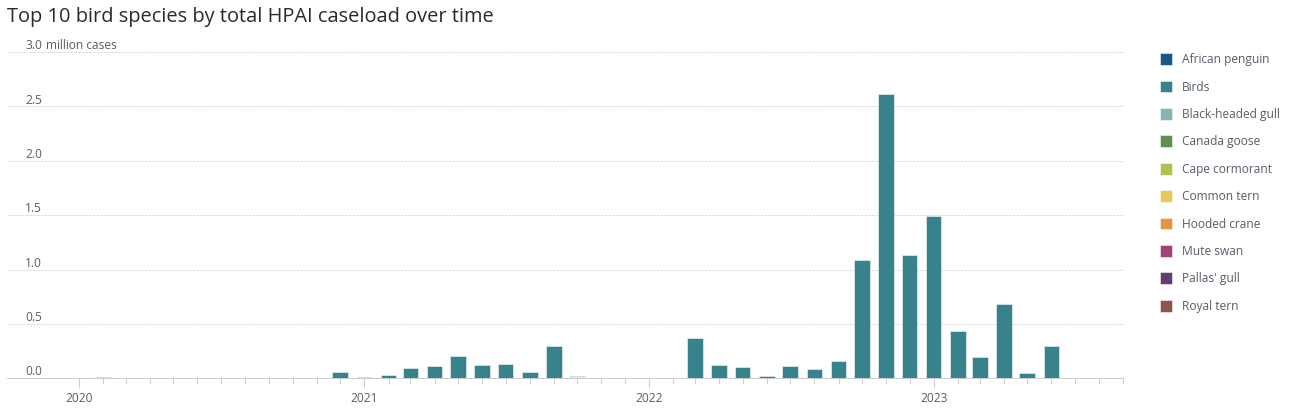

In [190]:
# Format figure
fig, ax = plt.subplots(figsize=(figure_size))
ax.spines.left.set_visible(False)

# Format bottom axis
for axis in ['bottom']:
    ax.spines[axis].set_color(chart[2])
    
# Add grid lines    
plt.grid(axis='y')

# Define variables
x=pivot_df['yearMonth']
y1=pivot_df['Spheniscus demersus']
y2=pivot_df['Aves']
y3=pivot_df['Chroicocephalus ridibundus']
y4=pivot_df['Branta canadensis']
y5=pivot_df['Phalacrocorax capensis']
y6=pivot_df['Sterna hirundo']
y7=pivot_df['Grus monacha']
y8= pivot_df['Cygnus olor']
y9 = pivot_df['Ichthyaetus ichthyaetus']
y10 =pivot_df['Thalasseus maximus']

# Plot bars
# The thing that gets plotted last in this list gets plotted on the bottom

plt.bar(x, y1, bottom=y2+y3+y4+y5+y6+y7+y8+y9+y10, linewidth=0.5, width=20, align="center", color=colors[0], label='African penguin') 
plt.bar(x, y2, bottom=y3+y4+y5+y6+y7+y8+y9+y10, linewidth=0.5, width=20, align="center", color=colors[1], label='Birds')
plt.bar(x, y3, bottom=y4+y5+y6+y7+y8+y9+y10, linewidth=0.5,width=20, align="center", color=colors[2], label='Black-headed gull')
plt.bar(x, y4, bottom=y5+y6+y7+y8+y9+y10, linewidth=0.5,width=20, align="center", color=colors[3], label='Canada goose')
plt.bar(x, y5, bottom=y6+y7+y8+y9+y10, linewidth=0.5, width=20, align="center", color=colors[4], label='Cape cormorant')
plt.bar(x, y6, bottom=y7+y8+y9+y10, linewidth=0.5, width=20, align="center", color=colors[5], label='Common tern')
plt.bar(x, y7, bottom=y8+y9+y10, linewidth=0.5,width=20, align="center", color=colors[6], label='Hooded crane')
plt.bar(x, y8, bottom=y9+y10, linewidth=0.5,width=20, align="center", color=colors[8], label='Mute swan')
plt.bar(x, y9, bottom=y10, linewidth=0.5, width=20, align="center", color=colors[9], label="Pallas' gull")
plt.bar(x, y10, bottom=0, linewidth=0.5, width=20, align="center", color=colors[10], label='Royal tern')


ax.xaxis_date()

# Define x-axis range
left = dt.date(2019, 10, 1)
right = dt.date(2023, 9, 1)

# Changes x-axis range
plt.gca().set_xbound(left, right)

# Changes y-axis range
plt.gca().set_ybound(0,3000000)

# Set major and minor date tick locators
maj_loc = mdates.YearLocator()
ax.xaxis.set_major_locator(maj_loc)
min_loc = mdates.MonthLocator()
ax.xaxis.set_minor_locator(min_loc)

# Set major date tick formatter
maj_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(maj_fmt)

# Hide minor tick labels
ax.xaxis.set_tick_params(which='minor', labelbottom=False)

# Set title
title = "Top 10 bird species by total HPAI caseload over time"
plt.title(title, fontdict=titlefont, loc='left')

# Set x-axis label
plt.xlabel("")

# Extend x-axis without showing labels
for label in ax.xaxis.get_ticklabels()[:1]:
    label.set_visible(False)
    
for x in ax.xaxis.get_major_ticks()[:1]:
    x.set_visible(False) 
    
for x in ax.xaxis.get_minor_ticks()[:3]:
    x.set_visible(False)

# Format y-axis label
plt.ylabel("million cases", rotation=0,loc='top',labelpad=-110,color=chart[1])
for tick in ax.get_yticklabels():
    tick.set_verticalalignment("bottom")
    
# Custom label formatter for y-axis
def millions_formatter(x, pos):
    tick.set_verticalalignment("bottom")
    return float(x/1e6)

# Apply the custom label formatter to y-axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(millions_formatter))
    
# # after plotting the data, format the labels
# current_values = plt.gca().get_yticks()
# plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


# Get the legend and modify the handles
handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.15,1.03),labelcolor=chart[1],labelspacing=1.2)


# plt.tight_layout()
# plt.show()
# plt.savefig('figures/hpai_bird_10_2020.png', dpi=1200, facecolor='w', 
#             edgecolor='w', 
#             orientation='portrait',bbox_inches='tight')

In [105]:

# Pivot the DataFrame with species as columns
pivot_master = master.pivot_table(index='yearMonth', columns='class', values='monthlyCases', aggfunc='sum', fill_value=0)

# Flatten the DataFrame
pivot_master.reset_index(inplace=True)

# Set 'yearMonth' as the index again
pivot_master.set_index('yearMonth', inplace=True)

# Resample the DataFrame and forward fill missing months
pivot_master = pivot_master.asfreq('MS',fill_value=0).reset_index()

In [106]:
pivot_master.head()

class,yearMonth,Actinopteri,Aves,Mammalia
0,2005-07-01,0,3628,0
1,2005-08-01,0,29021,0
2,2005-09-01,0,44,0
3,2005-10-01,0,15556,0
4,2005-11-01,0,2878,0


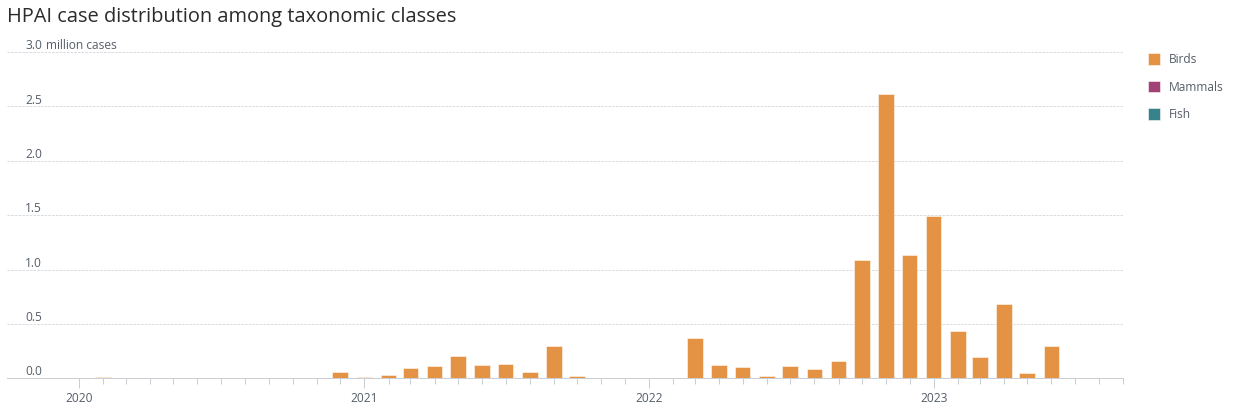

In [136]:
# Format figure
fig, ax = plt.subplots(figsize=(figure_size))
ax.spines.left.set_visible(False)

# Format bottom axis
for axis in ['bottom']:
    ax.spines[axis].set_color(chart[2])
    
# Add grid lines    
plt.grid(axis='y')

x = pivot_master['yearMonth']
y1 = pivot_master['Aves']
y2 = pivot_master['Mammalia']
y3 = pivot_master['Actinopteri']



# Plot bars
# The thing that gets plotted last in this list gets plotted on the bottom

plt.bar(x, y1, bottom=y2+y3, linewidth=0.5,width=20, align="center", color=colors[6], label='Birds')
plt.bar(x, y2, bottom=y3, linewidth=0.5, width=20, align="center", color=colors[8], label='Mammals')
plt.bar(x, y3, bottom=0, linewidth=0.5, width=20, align="center", color=colors[1], label='Fish')


ax.xaxis_date()

# Define x-axis range
left = dt.date(2019, 10, 1)
right = dt.date(2023, 9, 1)

# Changes x-axis range
plt.gca().set_xbound(left, right)

# Changes y-axis range
plt.gca().set_ybound(0,3000000)

# Set major and minor date tick locators
maj_loc = mdates.YearLocator()
ax.xaxis.set_major_locator(maj_loc)
min_loc = mdates.MonthLocator()
ax.xaxis.set_minor_locator(min_loc)

# Set major date tick formatter
maj_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(maj_fmt)

# Hide minor tick labels
ax.xaxis.set_tick_params(which='minor', labelbottom=False)

# Set title
title = "HPAI case distribution among taxonomic classes"
plt.title(title, fontdict=titlefont, loc='left')

# Set x-axis label
plt.xlabel("")

# Extend x-axis without showing labels
for label in ax.xaxis.get_ticklabels()[:1]:
    label.set_visible(False)
    
for x in ax.xaxis.get_major_ticks()[:1]:
    x.set_visible(False) 
    
for x in ax.xaxis.get_minor_ticks()[:3]:
    x.set_visible(False)

# Format y-axis label
plt.ylabel("million cases", rotation=0,loc='top',labelpad=-110,color=chart[1])
for tick in ax.get_yticklabels():
    tick.set_verticalalignment("bottom")

    
# Custom label formatter for y-axis
def millions_formatter(x, pos):
    return float(x/1e6)

# Apply the custom label formatter to y-axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(millions_formatter))

# # after plotting the data, format the labels
# current_values = plt.gca().get_yticks()
# plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


# Get the legend and modify the handles
handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.10,1.03),labelcolor=chart[1],labelspacing=1.2)


# plt.tight_layout()
# plt.show()
# plt.savefig('figures/hpai_cases_class_2020-2023.png', dpi=1200, facecolor='w', 
#             edgecolor='w', 
#             orientation='portrait',bbox_inches='tight')

In [141]:
# Filter the DataFrame to only include rows where class is "mammalia"
mammals = pivot_master[['yearMonth',"Mammalia"]]

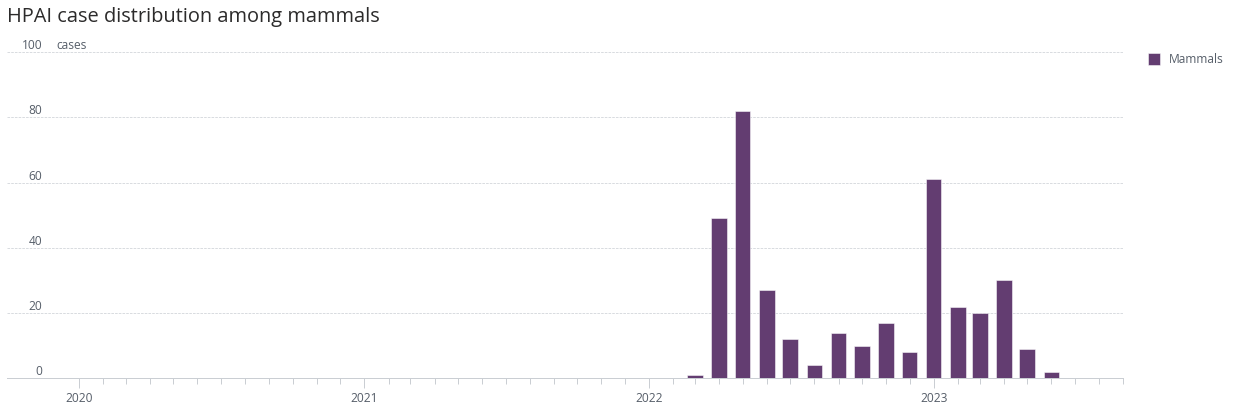

In [147]:
# Format figure
fig, ax = plt.subplots(figsize=(figure_size))
ax.spines.left.set_visible(False)

# Format bottom axis
for axis in ['bottom']:
    ax.spines[axis].set_color(chart[2])
    
# Add grid lines    
plt.grid(axis='y')

x = mammals['yearMonth']
y2 = mammals['Mammalia']


# Plot bars
# The thing that gets plotted last in this list gets plotted on the bottom

plt.bar(x, y2, bottom=0, linewidth=0.5, width=20, align="center", color=colors[9], label='Mammals')

ax.xaxis_date()


# Define x-axis range
left = dt.date(2019, 10, 1)
right = dt.date(2023, 9, 1)

# Changes x-axis range
plt.gca().set_xbound(left, right)

# Changes y-axis range
plt.gca().set_ybound(0,100)

# Set major and minor date tick locators
maj_loc = mdates.YearLocator()
ax.xaxis.set_major_locator(maj_loc)
min_loc = mdates.MonthLocator()
ax.xaxis.set_minor_locator(min_loc)

# Set major date tick formatter
maj_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(maj_fmt)

# Hide minor tick labels
ax.xaxis.set_tick_params(which='minor', labelbottom=False)

# Set title
title = "HPAI case distribution among mammals"
plt.title(title, fontdict=titlefont, loc='left')

# Set x-axis label
plt.xlabel("")

# Extend x-axis without showing labels
for label in ax.xaxis.get_ticklabels()[:1]:
    label.set_visible(False)
    
for x in ax.xaxis.get_major_ticks()[:1]:
    x.set_visible(False) 
    
for x in ax.xaxis.get_minor_ticks()[:3]:
    x.set_visible(False)

# Format y-axis label
plt.ylabel("cases", rotation=0,loc='top',labelpad=-80,color=chart[1])
for tick in ax.get_yticklabels():
    tick.set_verticalalignment("bottom")

    
# # Custom label formatter for y-axis
# def billions_formatter(x, pos):
#     return float(x/1e9)

# # Apply the custom label formatter to y-axis
# ax.yaxis.set_major_formatter(plt.FuncFormatter(billions_formatter))

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


# Get the legend and modify the handles
handles, labels = ax.get_legend_handles_labels()
leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.10,1.03),labelcolor=chart[1],labelspacing=1.2)


# plt.tight_layout()
# plt.show()
plt.savefig('figures/hpai_cases_mammals_2020-2023.png', dpi=1200, facecolor='w', 
            edgecolor='w', 
            orientation='portrait',bbox_inches='tight')

In [200]:
uq = pd.read_csv("data/event_host_path_pairings_count.csv")
country_match = pd.read_csv('data/country_match.csv')

uq = pd.merge(uq, country_match, left_on="country",right_on="iso2", how = "inner")
uq = uq.drop(['name','iso2','country'], axis=1)

uq['iso3']=uq['iso3'].apply(remove_chars)

In [201]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world.rename(columns={"iso_a3":"iso3"})
cols = ['name','iso3','geometry']
world = world[cols]
world = world.sort_values(by="iso3")

In [202]:
# Fix issues in geopandas
world.loc[world['name'] == 'France', 'iso3'] = 'FRA'
world.loc[world['name'] == 'Norway', 'iso3'] = 'NOR'
world.loc[world['name'] == 'Somaliland', 'iso3'] = 'SOM'
world.loc[world['name'] == 'Kosovo', 'iso3'] = 'RKS'

In [203]:
uq = pd.merge(world,uq,on='iso3',how='outer')

In [204]:
uq = uq[(uq.name != "Antarctica")]

In [211]:
uq["COUNT(DISTINCT combo)"].unique()

array([nan, 38.,  6.,  9.,  5., 14., 16., 30.,  1., 35.,  2.,  4.,  7.,
        8., 11., 34., 33., 31., 43., 25., 17., 42., 22., 29., 19., 86.,
       26., 21., 48., 70., 68., 20., 27.,  3., 12., 13., 10., 51., 18.,
       15., 61., 52.])

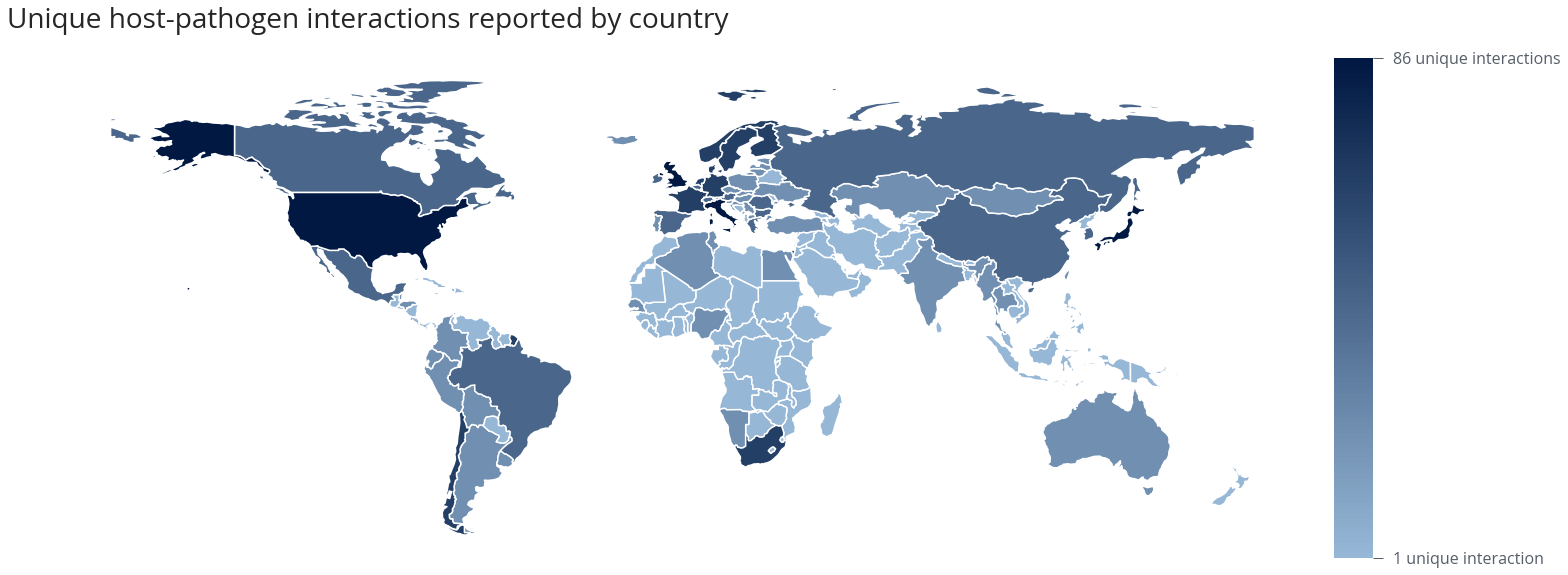

In [213]:
# Create a new figure and axes
fig, ax = plt.subplots(figsize=(24, 18))

vmin=0
vmax=86

# Plot the map
uq.plot(column='COUNT(DISTINCT combo)',
           cmap=cm,
           scheme='naturalbreaks',
           legend=False,
           ax=ax
          )

# Adjust margins and set title
ax.margins(x=0.05) 

ttl = ax.set_title('Unique host-pathogen interactions reported by country',fontsize=28)
ttl.set_position([0.25,1.05])


# Set the background color of the map
ax.set(facecolor='white')

# Turn axis off
ax.axis('off')

# Create a colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05)
sm = plt.cm.ScalarMappable(cmap=cm,
                           norm=plt.Normalize(vmin=vmin,
                                              vmax=vmax))


sm._A = []
cbar = plt.colorbar(sm,cax=cax,drawedges=False)
cbar.set_ticks([vmin,vmax])
cbar.ax.yaxis.set_ticklabels(["1 unique interaction","86 unique interactions"])
cbar.ax.yaxis.set_tick_params(direction='out',length=10,width=1,pad=10,colors=chart[1],labelsize=16)
cbar.outline.set_visible(False)

# # # # Display the map
# plt.tight_layout()
# plt.show()

# # # Save
plt.savefig('figures/uq_host_path_from_events.png', dpi=1200, facecolor='w', 
            edgecolor='w', 
            orientation='portrait',bbox_inches='tight')

In [217]:
uq_time = pd.read_csv("data/event_host_path_pairings_yearMonth.csv")

uq_time['yearMonth'] = uq_time['yearMonth'].apply(remove_chars)
uq_time['yearMonth'] = pd.to_datetime(uq_time['yearMonth'], format="%Y-%m")

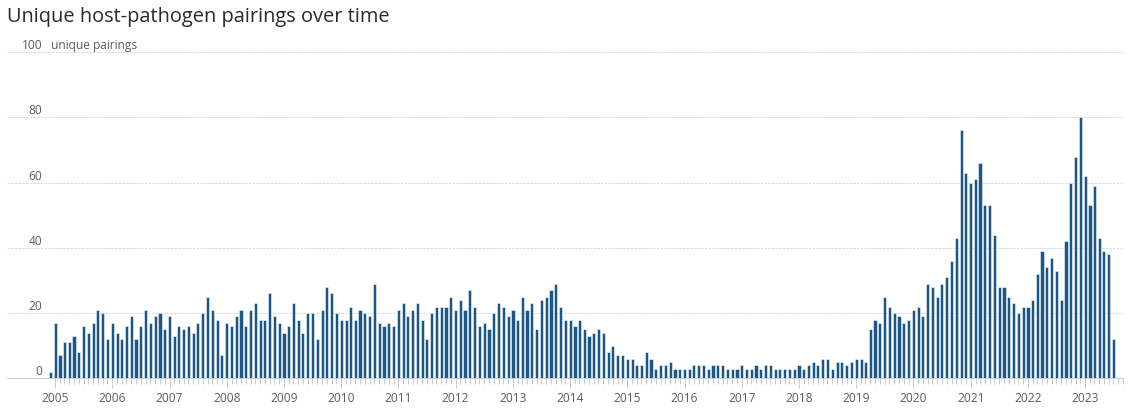

In [230]:
# Format figure
fig, ax = plt.subplots(figsize=(figure_size))
ax.spines.left.set_visible(False)

# Format bottom axis
for axis in ['bottom']:
    ax.spines[axis].set_color(chart[2])
    
# Add grid lines    
plt.grid(axis='y')

x = uq_time['yearMonth']
y2 = uq_time['COUNT(DISTINCT combo)']


# Plot bars
# The thing that gets plotted last in this list gets plotted on the bottom

plt.bar(x, y2, bottom=0, linewidth=0.5, width=20, align="center", color=colors[0])

ax.xaxis_date()


# Define x-axis range
left = dt.date(2004, 3, 1)
right = dt.date(2023, 9, 1)

# Changes x-axis range
plt.gca().set_xbound(left, right)

# Changes y-axis range
plt.gca().set_ybound(0,100)

# Set major and minor date tick locators
maj_loc = mdates.YearLocator()
ax.xaxis.set_major_locator(maj_loc)
min_loc = mdates.MonthLocator()
ax.xaxis.set_minor_locator(min_loc)

# Set major date tick formatter
maj_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(maj_fmt)

# Hide minor tick labels
ax.xaxis.set_tick_params(which='minor', labelbottom=False)

# Set title
title = "Unique host-pathogen pairings over time"
plt.title(title, fontdict=titlefont, loc='left')

# Set x-axis label
plt.xlabel("")

# Extend x-axis without showing labels
for label in ax.xaxis.get_ticklabels()[:1]:
    label.set_visible(False)
    
for x in ax.xaxis.get_major_ticks()[:1]:
    x.set_visible(False) 
    
for x in ax.xaxis.get_minor_ticks()[:10]:
    x.set_visible(False)

# Format y-axis label
plt.ylabel("unique pairings", rotation=0,loc='top',labelpad=-130,color=chart[1])
for tick in ax.get_yticklabels():
    tick.set_verticalalignment("bottom")

    
# # Custom label formatter for y-axis
# def billions_formatter(x, pos):
#     return float(x/1e9)

# # Apply the custom label formatter to y-axis
# ax.yaxis.set_major_formatter(plt.FuncFormatter(billions_formatter))

# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


# # Get the legend and modify the handles
# handles, labels = ax.get_legend_handles_labels()
# leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(1.10,1.03),labelcolor=chart[1],labelspacing=1.2)


# plt.tight_layout()
# plt.show()
plt.savefig('figures/uq_host_path_pairings_from_events_over_time.png', dpi=1200, facecolor='w', 
            edgecolor='w', 
            orientation='portrait',bbox_inches='tight')